In [6]:
# 1. read SVG library
from defectlib import reader
from defectlib import die as d

In [7]:
basePath, BaseAttributes = reader.__read('../base_design_V4.svg') # Reads the svg file

In [8]:
membrane_defects = d.Die(basePath, BaseAttributes, -700, -950, 1400, 1650, width=1400, height=1650) 
particle_defects = d.Die(basePath, BaseAttributes, -700, -950, 1400, 1650, width=1400, height=1650) 
# loads svg into the library.. 
# the numbers 0,0, 67.733, 67.733 are viewbox dimensions... this is very important as it is used to render the image and get the accurate coordinates
# For now I have modified for it to work manually, but ideally it should be automatic

In [9]:
membrane_defects.generate_membrane( amount=2) # uses the library to generate 2 defects, there are also settings such as 'size'
particle_defects.generate_particles("background",3,8,4,2)

In [10]:
membrane_defects.write_svg() # creates a folder with the generated images in svg and png formats
particle_defects.write_svg()

In [11]:
membrane_defects.generate_membrane_csv()
membrane_defects.write_complete_csv('membrane') # writes the coordinates in csv file
particle_defects.generate_particles_csv()
particle_defects.write_complete_csv('particles') # writes the coordinates in csv file

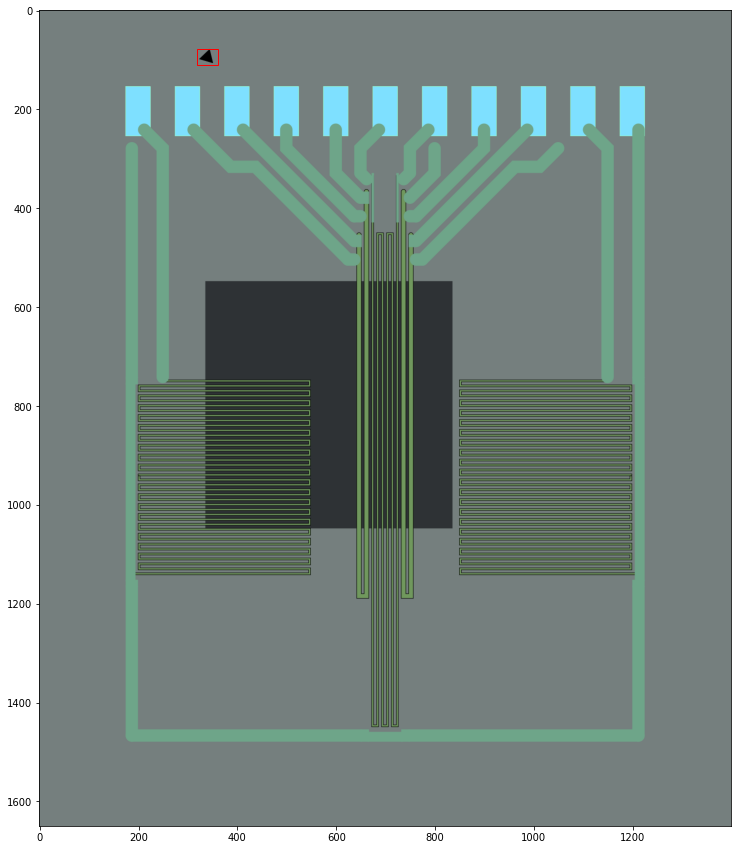

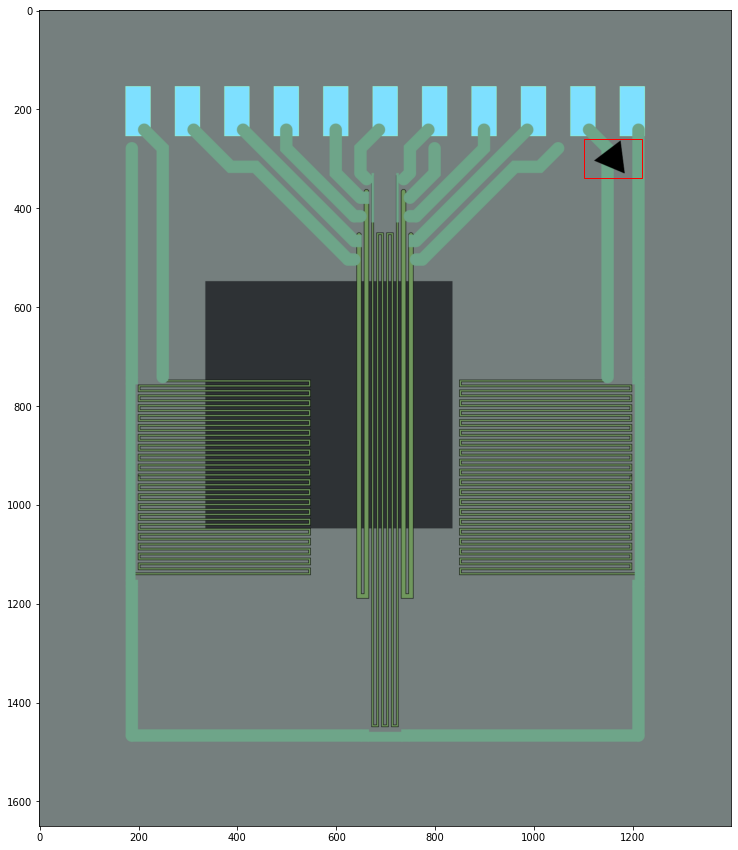

In [12]:
# Just to visually see what is happening.. drawing.svg is the original file
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

import pandas as pd

defects = pd.read_csv('particles.csv')
truncated = defects[defects.columns[4:]]

for images in range(2):
    plt.figure(figsize=(15,15))
    img = plt.imread('generated_images/png/particles_'+ str(images) + '.png')
    plt.imshow(img)
    ymin, xmin, ymax, xmax = truncated.iloc[images]
    w = xmax - xmin
    h = ymax - ymin
    plt.gca().add_patch(Rectangle((xmin,ymin), w, h, linewidth=1, edgecolor='r', facecolor='none'))
